<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%pip install numpy pandas seaborn

ERROR: unknown command "íntall" - maybe you meant "install"


In [7]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

In [8]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [11]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

Đầu tiên, hãy thử xem các biến `FlightNumber` (chỉ số lần phóng liên tục) và `Payload` sẽ ảnh hưởng đến kết quả phóng như thế nào.

Chúng ta có thể vẽ biểu đồ FlightNumber so với PayloadMass và chồng lên kết quả phóng. Chúng ta thấy rằng khi số lần phóng tăng lên, tầng đầu tiên có nhiều khả năng hạ cánh thành công hơn. Khối lượng tải trọng cũng dường như là một yếu tố; ngay cả với tải trọng lớn hơn, tầng đầu tiên thường trở về thành công.

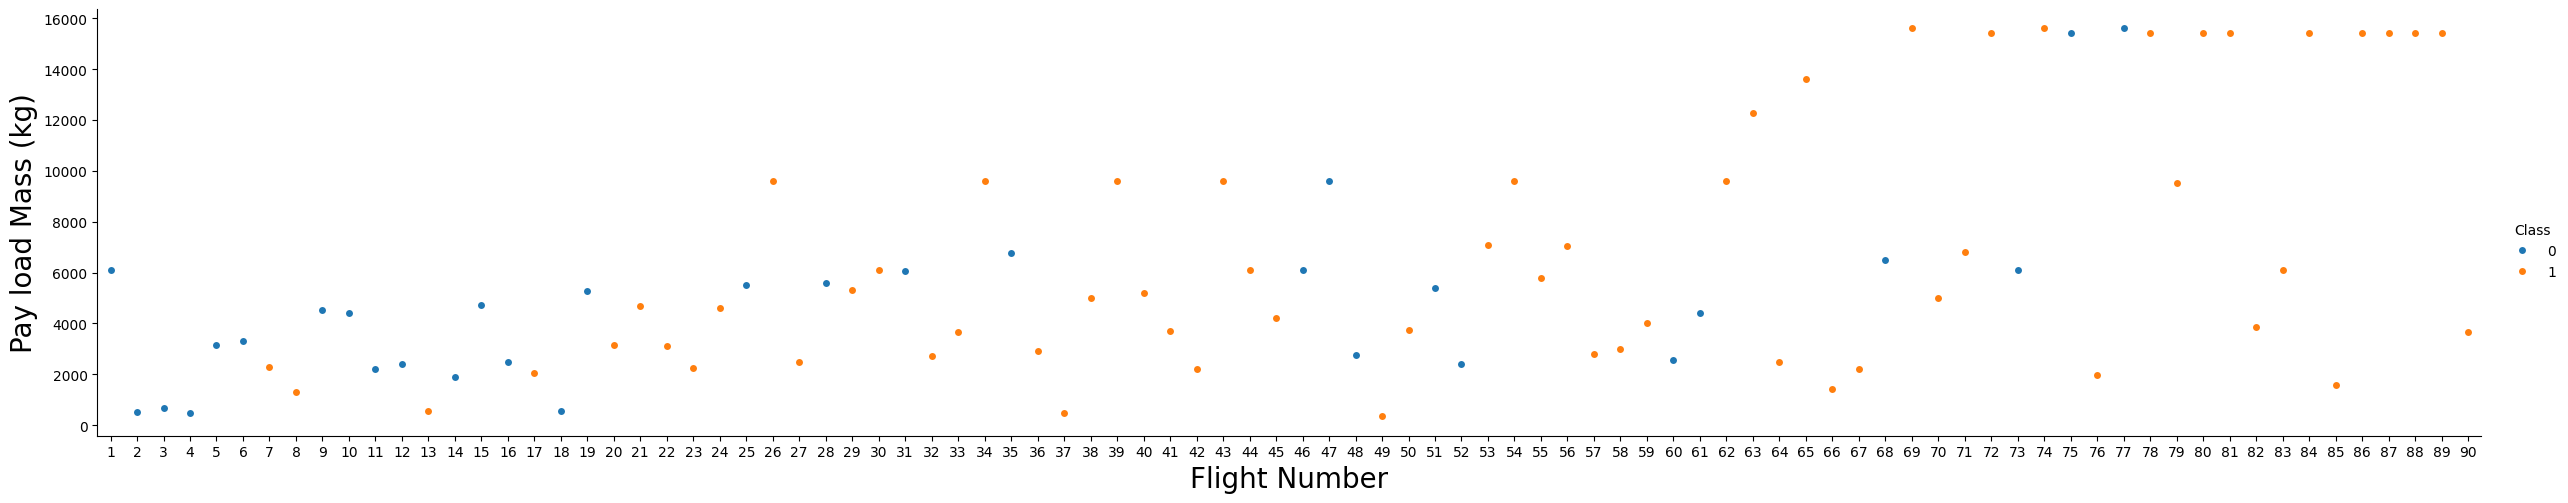

In [12]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

Tiếp theo, hãy đi sâu vào từng địa điểm để hình dung chi tiết hồ sơ phóng của nó.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

### NHIỆM VỤ 1: Trực quan hóa mối quan hệ giữa Số hiệu chuyến bay và Địa điểm phóng

Use the function catplot to plot FlightNumber vs LaunchSite, set the  parameter x  parameter to FlightNumber,set the  y to Launch Site and set the parameter hue to 'class'

Sử dụng hàm catplot để vẽ biểu đồ FlightNumber so với LaunchSite, đặt tham số x là FlightNumber, đặt y là Launch Site và đặt tham số hue là 'class'

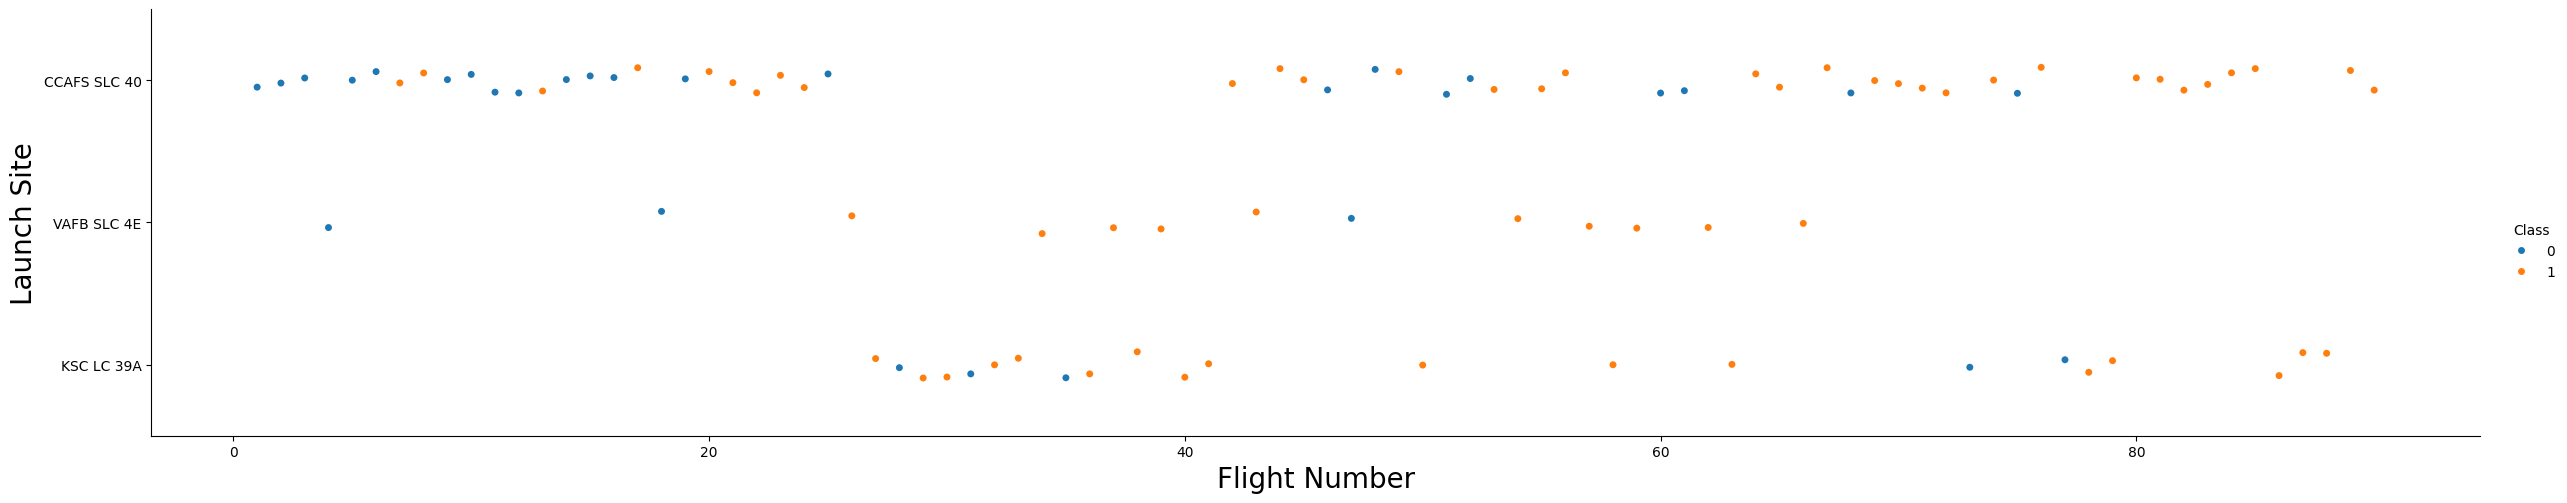

In [13]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

Bây giờ hãy thử giải thích các mẫu bạn tìm thấy trong biểu đồ điểm phân tán Số hiệu chuyến bay so với Địa điểm phóng.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


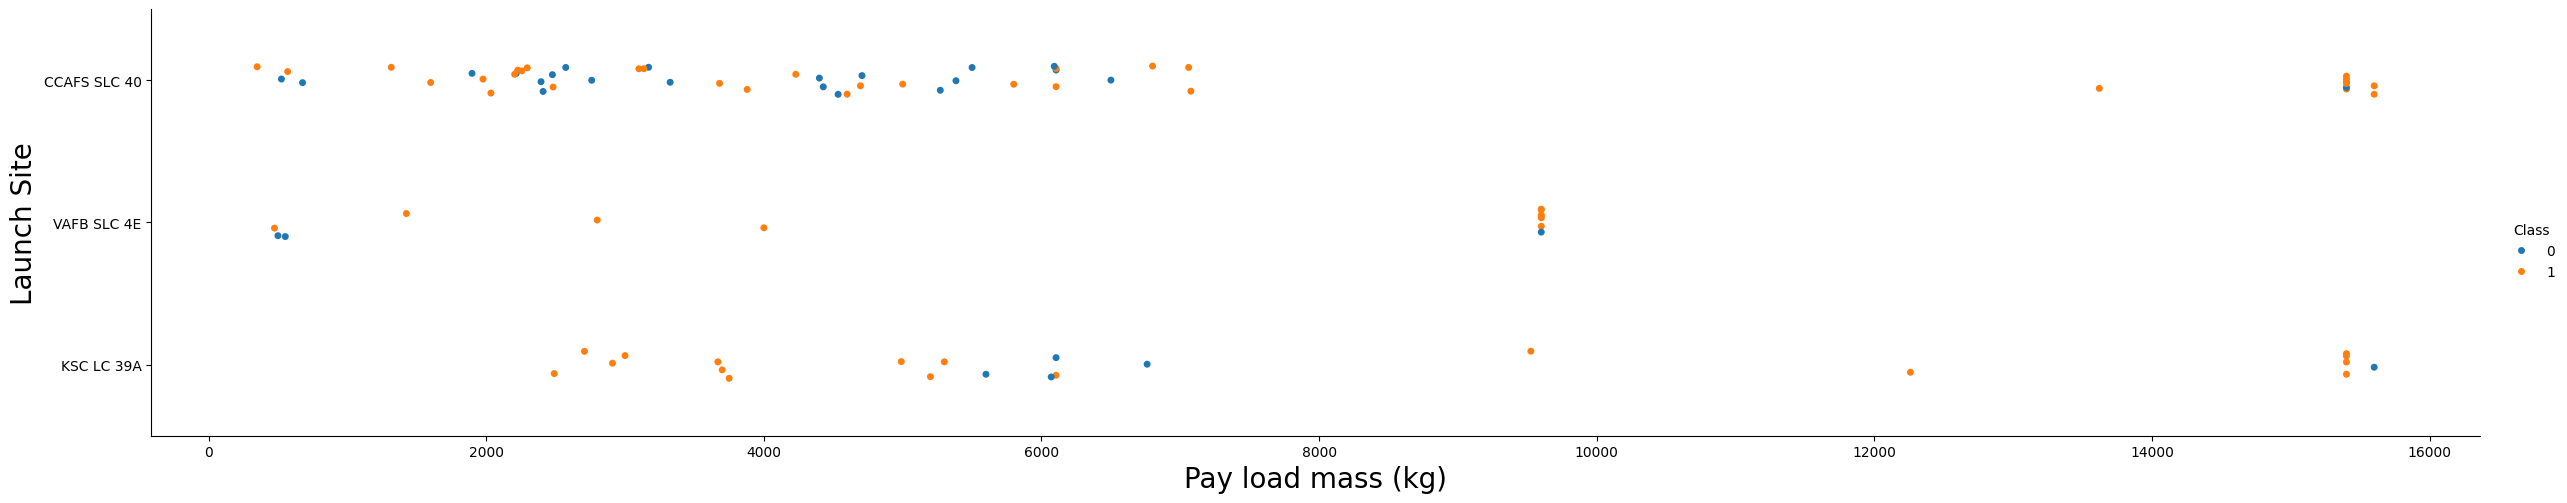

In [14]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel('Pay load mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

Bây giờ nếu bạn quan sát biểu đồ điểm phân tán Khối lượng tải trọng so với Địa điểm phóng, bạn sẽ thấy tại địa điểm phóng VAFB-SLC không có tên lửa nào được phóng cho tải trọng nặng (lớn hơn 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type

### NHIỆM VỤ 3: Trực quan hóa mối quan hệ giữa tỷ lệ thành công của từng loại quỹ đạo

Next, we want to visually check if there are any relationship between success rate and orbit type.

Tiếp theo, chúng ta muốn kiểm tra trực quan xem có bất kỳ mối quan hệ nào giữa tỷ lệ thành công và loại quỹ đạo hay không.

Let's create a `bar chart` for the sucess rate of each orbit

Hãy tạo một `biểu đồ cột` cho tỷ lệ thành công của từng loại quỹ đạo

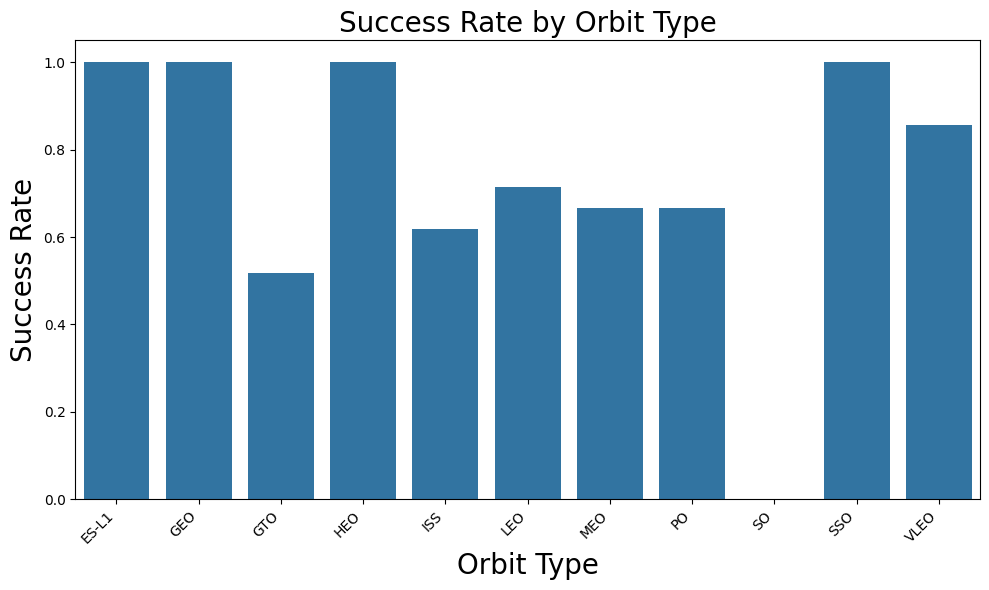

In [15]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


Phân tích biểu đồ cột tỷ lệ thành công theo loại quỹ đạo:

Dựa vào biểu đồ cột đã vẽ ở trên, các quỹ đạo có tỷ lệ thành công cao nhất là những quỹ đạo có cột đạt đến mức 1.0 trên trục y. Các quỹ đạo này bao gồm:

*   **ES-L1**
*   **GEO**
*   **HEO**
*   **SSO**

Các quỹ đạo khác có tỷ lệ thành công thấp hơn hoặc trung bình, ví dụ như GTO có tỷ lệ thành công chỉ hơn 50%.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

### NHIỆM VỤ 4: Trực quan hóa mối quan hệ giữa Số hiệu chuyến bay và loại quỹ đạo

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

Đối với mỗi quỹ đạo, chúng ta muốn xem có bất kỳ mối quan hệ nào giữa Số hiệu chuyến bay và loại quỹ đạo hay không.

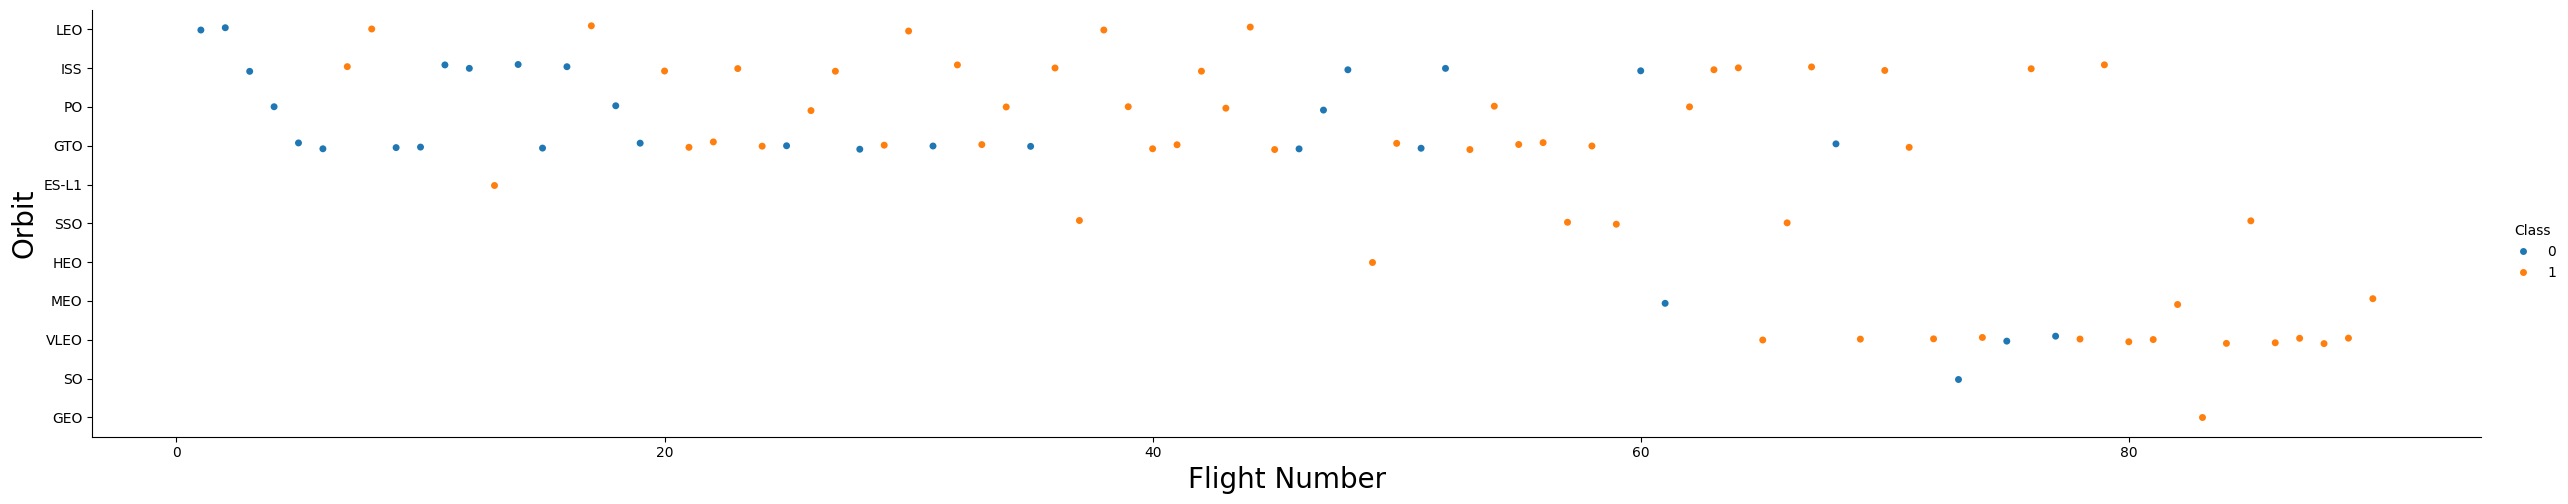

In [16]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type

### NHIỆM VỤ 5: Trực quan hóa mối quan hệ giữa Khối lượng tải trọng và loại quỹ đạo

Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

Tương tự, chúng ta có thể vẽ biểu đồ điểm phân tán Khối lượng tải trọng so với Quỹ đạo để làm rõ mối quan hệ giữa Khối lượng tải trọng và loại quỹ đạo.

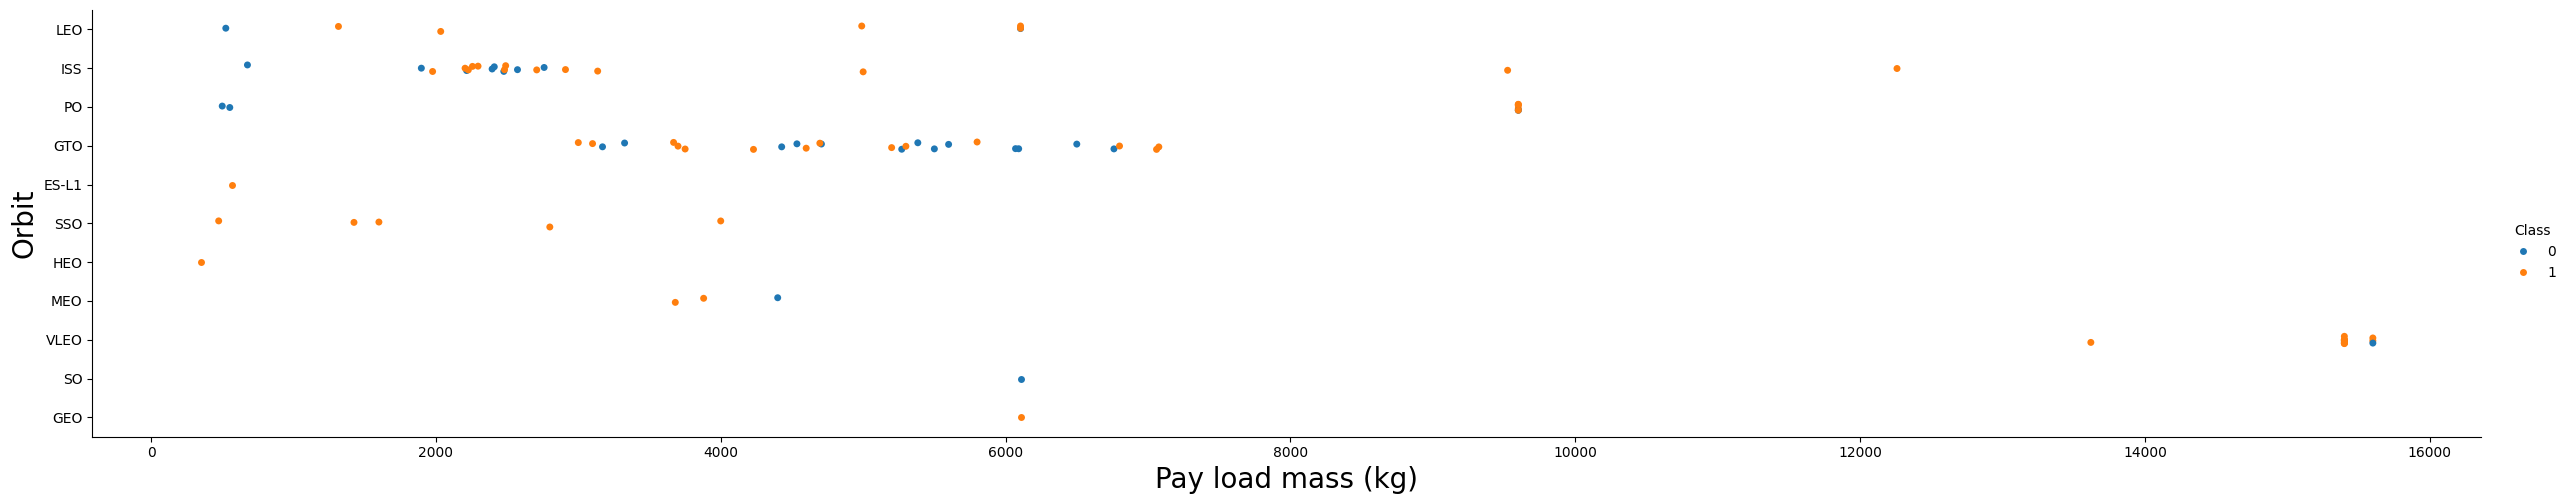

In [17]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel('Pay load mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

Với tải trọng nặng, tỷ lệ hạ cánh thành công hoặc tỷ lệ hạ cánh dương cao hơn đối với quỹ đạo Polar, LEO và ISS.

Tuy nhiên, đối với GTO, rất khó phân biệt giữa hạ cánh thành công và không thành công vì cả hai kết quả đều có mặt

### TASK  6: Visualize the launch success yearly trend

### NHIỆM VỤ 6: Trực quan hóa xu hướng thành công phóng hàng năm

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

Bạn có thể vẽ biểu đồ đường với trục x là Năm và trục y là tỷ lệ thành công trung bình, để có được xu hướng thành công phóng trung bình.

The function will help you get the year from the date:

Hàm này sẽ giúp bạn lấy năm từ ngày:

In [18]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


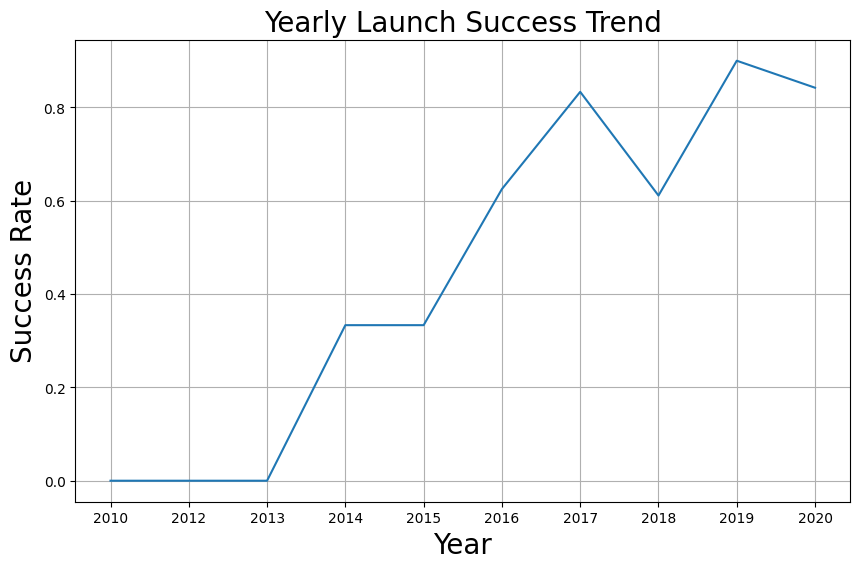

In [19]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success_rate = df.groupby('Date')['Class'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('Yearly Launch Success Trend', fontsize=20)
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

### NHIỆM VỤ 7: Tạo biến giả cho các cột phân loại

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.

Sử dụng hàm get_dummies và dataframe features để áp dụng OneHotEncoder cho các cột Orbits, LaunchSite, LandingPad và Serial. Gán giá trị cho biến features_one_hot, hiển thị kết quả bằng cách sử dụng phương thức head. Dataframe kết quả của bạn phải bao gồm tất cả các tính năng bao gồm cả các tính năng đã được mã hóa.

In [21]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
print('DataFrame with dummy variables:')
display(features_one_hot.head())

DataFrame with dummy variables:


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [22]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
print('DataFrame with float64 data type:')
display(features_one_hot.head())

DataFrame with float64 data type:


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['FlightNumber'].plot(kind='hist', bins=20, title='FlightNumber')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PayloadMass'].plot(kind='hist', bins=20, title='PayloadMass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Orbit_GTO'].plot(kind='hist', bins=20, title='Orbit_GTO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Orbit_ISS'].plot(kind='hist', bins=20, title='Orbit_ISS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='FlightNumber', y='PayloadMass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PayloadMass', y='Orbit_GTO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Orbit_GTO', y='Orbit_ISS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Orbit_ISS', y='Orbit_LEO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['PayloadMass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('FlightNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('PayloadMass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['Orbit_ISS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('FlightNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('Orbit_ISS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['Orbit_LEO']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('FlightNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('Orbit_LEO')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['Orbit_PO']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('FlightNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('Orbit_PO')

from matplotlib import pyplot as plt
_df_12['FlightNumber'].plot(kind='line', figsize=(8, 4), title='FlightNumber')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['PayloadMass'].plot(kind='line', figsize=(8, 4), title='PayloadMass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Orbit_GTO'].plot(kind='line', figsize=(8, 4), title='Orbit_GTO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Orbit_ISS'].plot(kind='line', figsize=(8, 4), title='Orbit_ISS')
plt.gca().spines[['top', 'right']].set_visible(False)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [24]:
features_one_hot.to_csv('/content/drive/My Drive/ColabNotebooks/Coursera/data_scientist/applies_data_science_capstone/module2_exploratory_data_analysis/dataset_part3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
